# Data Exploratory and Preprocessing 
*In this part of the code we are downloading the data from json file turn it to csv and exlpore it*






In [11]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
# Saving the lemmatizer into an object
from nltk.stem.wordnet import WordNetLemmatizer
# Downloading punkt and wordnet from NLTK
import nltk
nltk.download('punkt')
print("------------------------------------------------------------")
# Downloading punkt and wordnet from NLTK
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = list(stopwords.words('german'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import pandas as pd
import numpy as np
import urllib, json
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import nltk



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:

#Reading the TalentBait Json file
url = "https://talentbait-assets.s3.eu-central-1.amazonaws.com/tech_soft_none.json"
json_url = urllib.request.urlopen(url)

data = json.loads(json_url.read())

     

In [0]:
data.keys()

dict_keys(['data'])

In [0]:
df = pd.DataFrame (data["data"], columns = ['label','text'])

In [0]:
categories = df.label.unique()


In [0]:

# One_Hot_Encoding the different label  
label_df = pd.DataFrame(df.label, columns=['label'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(label_df, columns=["label"] )
df =df.join(dum_df)


df

,label,text,label_none,label_soft,label_tech
0,none,"Standort Trovarit AG München, Deutschland",1,0,0
1,none,Wir freuen uns auf Ihre Bewerbung unter Angabe...,1,0,0
2,tech,Qualifikation zur Heimleitung gemäß Heimperson...,0,0,1
3,soft,Gute organisatorische und konzeptionelle Fähig...,0,1,0
4,soft,"Teamfähigkeit, hohe Flexibilität und Einsatzbe...",0,1,0
...,...,...,...,...,...
10244,none,Zu unserer Unternehmensgruppe gehören u. a. To...,1,0,0
10245,none,Zum Aufbau unserer Abteilung Entwicklung Posit...,1,0,0
10246,none,Zur vereinfachten Lesbarkeit verwenden wir im ...,1,0,0
10247,none,Zur Verstärkung der Marketing Abteilung WPR su...,1,0,0


In [0]:
df["label"] = df["label"].astype('category')
df["label_code"] = df["label"].cat.codes

df

,label,text,label_none,label_soft,label_tech,label_code
0,none,"Standort Trovarit AG München, Deutschland",1,0,0,0
1,none,Wir freuen uns auf Ihre Bewerbung unter Angabe...,1,0,0,0
2,tech,Qualifikation zur Heimleitung gemäß Heimperson...,0,0,1,2
3,soft,Gute organisatorische und konzeptionelle Fähig...,0,1,0,1
4,soft,"Teamfähigkeit, hohe Flexibilität und Einsatzbe...",0,1,0,1
...,...,...,...,...,...,...
10244,none,Zu unserer Unternehmensgruppe gehören u. a. To...,1,0,0,0
10245,none,Zum Aufbau unserer Abteilung Entwicklung Posit...,1,0,0,0
10246,none,Zur vereinfachten Lesbarkeit verwenden wir im ...,1,0,0,0
10247,none,Zur Verstärkung der Marketing Abteilung WPR su...,1,0,0,0


**Exploratory data analysis**

---



In [0]:

df_stats = df.drop(['text','label','label_code'], axis=1)
counts = []
categories = list(df_stats.columns.values)
for i in categories:
    counts.append((i, df_stats[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_text'])
df_stats



,category,number_of_text
0,label_none,4325
1,label_soft,3635
2,label_tech,2289


Text(0.5, 0, 'label')

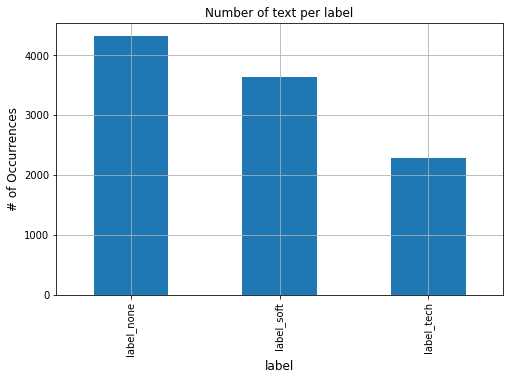

In [0]:
df_stats.plot(x='category', y='number_of_text', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of text per label")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('label', fontsize=12)

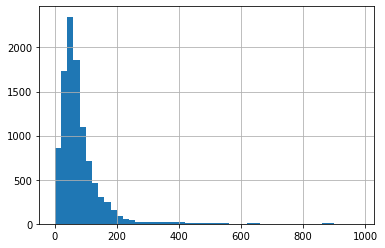

In [0]:
import numpy as np
lens = df.text.str.len()
lens.sum()
lens.hist(bins = np.arange(0,1000,20))

Most of the comment text length are within 400 characters, with some outliers up to 1000 characters long.

In [0]:
df_len_cara = df[df['text'].apply(
            lambda x: len(x)) > 400]
len(df_len_cara)

152

In [0]:
df['text_length'] = df['text'].apply(
            lambda x: len(x)) 


In [0]:
df_len_cara["text"].iloc[2]

'Kontakt Die Amadeus FiRe AG bringt als spezialisierter Personaldienstleister jeden Tag Fach- und Führungskräfte aus dem kaufmännischen und IT-Bereich mit nationalen und internationalen Unternehmen zusammen. Nutzen Sie unsere persönlichen Kontakte zu Arbeitgebern bundesweit! Wir empfehlen Sie an unsere Kunden weiter und erleichtern Ihnen damit den Einstieg ins Unternehmen! Für einen ersten vertraulichen Kontakt steht Ihnen Herr Andreas Klöckner (Tel +49 (0) 69 / 96 876 218) gerne zur Verfügung. Interessiert an der Stelle als Webentwickler (m/w)? Dann freuen wir uns auf Ihre aussagekräftigen Bewerbungsunterlagen (max. 5 MB) unter Angabe Ihrer Gehaltsvorstellung und des frühestmöglichen Eintrittstermins bevorzugt per Online-Bewerbungsformular oder per E-Mail an: it.frankfurt@amadeus-fire.de Amadeus FiRe AGZentrale Frankfurt Hanauer Landstraße 160 60314 Frankfurt'

In [0]:


print('Percentage of comments that are not labelled:')
print(len(df[(df['label_none']==1 ) ]) / len(df))

Percentage of comments that are not labelled:
0.42199238950141477


In [0]:

print('Number of missing text :')
df['text'].isnull().sum()

Number of missing text :


1

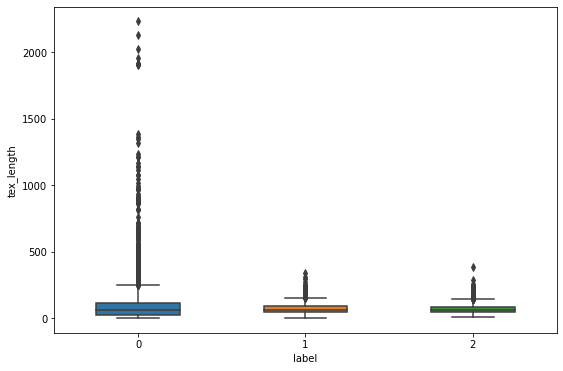

In [0]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='label', y='tex_length',width=.5);

Now, let's remove the larger text for better comprehension

In [0]:
df = df[df["tex_length"]<400]

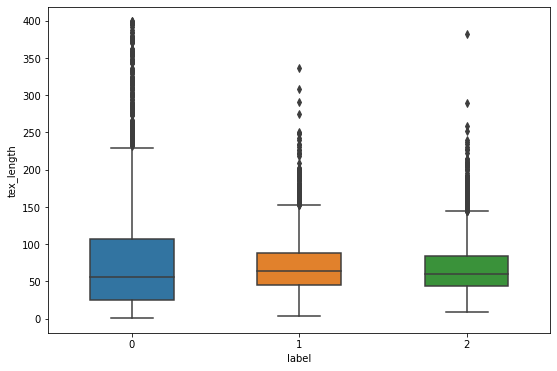

In [0]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df, x='label', y='tex_length',width=.5);

In [0]:
#Save CSV file 
from google.colab import drive
drive.mount('drive')
df.to_csv('data.csv')
!cp data.csv "drive/My Drive/TalentBait"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


# **Feature Engineering**
Start Cleaning the text
*   *Upcase/downcase*
*    *Punctuation signs*
*   remove " when quoting text and signs 
*   Lowercasing the text



In [0]:
#Read the csv file from drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Import the data frame from the Google spreadsheet
id = "1Ot5qeB4xzG6KITURE8Q3w3RhXMaeJaib"

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
df = pd.read_csv('data.csv')

In [0]:
def Clean_text(df):
  df_clean = df.copy()
  df_clean['text'] = df_clean['text'].astype(str)
  df_clean['text'] = df_clean['text'].str.lower()
  df_clean['text'] = df_clean['text'].str.replace("\r", " ")
  df_clean['text'] = df_clean['text'].str.replace("\n", " ")
  df_clean['text'] = df_clean['text'].str.replace("    ", " ")
  # " when quoting text
  df_clean['text'] = df_clean['text'].str.replace('"', '')

  # Lowercasing the text
  df_clean['text'] = df_clean['text'].str.lower()

  punctuation_signs = list("?:!.,;")
  df_clean['text'] = df_clean['text']

  for punct_sign in punctuation_signs:
    df_clean['text'] = df_clean['text'].str.replace(punct_sign, '')
  return df_clean

In [0]:
df_Clean = Clean_text(df)



*   Stemming & Lemmatizing




In [0]:

wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
def lemmatized_text(df):
  rows = len(df)
  lemmatized_text_list = []
  for text in df.text:
    lemmatized_list = []
  
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
      lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
      lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)
  return lemmatized_text_list

In [0]:
df_lemmatized = df_Clean.copy()
df_lemmatized["text"]=lemmatized_text(df_lemmatized)

In [0]:
stop_words[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [0]:
for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df_lemmatized['text'] = df_lemmatized['text'].str.replace(regex_stopword, '')

In [0]:
#Save CSV file 
from google.colab import drive
drive.mount('drive')
df_lemmatized.to_csv('data_embedded.csv')
!cp data.csv "drive/My Drive/TalentBait"

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).




---


# **Split to train and test sets**


---



In [0]:

X_train, X_test, y_train, y_test = train_test_split(df_lemmatized['text'], 
                                                    df_lemmatized['label_code'], 
                                                    test_size=0.33, 
                                                    random_state=8)





---


*   Text Representation :


> I choose to use the "TF-IDF Vector" as feature 
  i could also use other representation like ('Word embedding','Count Vector ' ...)








In [0]:

# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(6866, 300)
(3383, 300)


*We can use the Chi squared test in order to see what unigrams and bigrams are most correlated with each abel of text:*

In [0]:
from sklearn.feature_selection import chi2
import numpy as np
category_codes ={"none":0,"tech":1,"soft":2}
for label, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'none' category:
  . Most correlated unigrams:
. gute
. standort
. deutschland
. gmbh
. kenntnisse
  . Most correlated bigrams:
. ms office
. gute kenntnisse

# 'soft' category:
  . Most correlated unigrams:
. umgang
. sap
. office
. ms
. kenntnisse
  . Most correlated bigrams:
. gute kenntnisse
. ms office

# 'tech' category:
  . Most correlated unigrams:
. flexibilität
. hohe
. kenntnisse
. teamfähigkeit
. arbeitsweise
  . Most correlated bigrams:
. hohes maß
. wort schrift



In [0]:
bigrams

['verfügen gute',
 'amadeus fire',
 'angabe gehaltsvorstellung',
 'facebook twitter',
 'frankfurt be',
 'be main',
 'available job',
 'führerschein klasse',
 'gerne verfügung',
 'frühestmöglichen eintrittstermins',
 'gängigen ms',
 'insbesondere excel',
 'tel 49',
 'freuen bewerbung',
 'ab sofort',
 'office programmen',
 'kenntnisse sap',
 'know how',
 'edv kenntnisse',
 'sowie gute',
 'kenntnisse umgang',
 'office anwendungen',
 'gute ms',
 'nächstmöglichen zeitpunkt',
 'co kg',
 'per mail',
 'kenntnisse ms',
 'gmbh co',
 'office kenntnisse',
 'umgang ms',
 'fundierte kenntnisse',
 'sicherer umgang',
 'runden profil',
 'profil ab',
 'gute deutsch',
 'kenntnisse bereich',
 'hohe einsatzbereitschaft',
 'analytische fähigkeiten',
 'deutsch englisch',
 'deutsch englischkenntnisse',
 'kommunikative fähigkeiten',
 'denken handeln',
 'gute kenntnisse',
 'ms office',
 'selbstständige arbeitsweise',
 'englischkenntnisse wort',
 'sicheres auftreten',
 'strukturierte arbeitsweise',
 'gute englis

Saving the features and result of the feature engineering

In [0]:
import pickle
from google.colab import files 
# X_train
with open('X_train.pickle', 'wb') as output:
    pickle.dump(X_train, output)
files.download('X_train.pickle') 

# X_test 
  
with open('X_test.pickle', 'wb') as output:
    pickle.dump(X_test, output)
files.download('X_test.pickle')
# y_train
with open('y_train.pickle', 'wb') as output:
    pickle.dump(y_train, output)
files.download('y_train.pickle')
   
# y_test
with open('y_test.pickle', 'wb') as output:
    pickle.dump(y_test, output)
files.download('y_test.pickle')
  
# df
with open('df.pickle', 'wb') as output:
    pickle.dump(df, output)
files.download('df.pickle')
   
# features_train
with open('features_train.pickle', 'wb') as output:
    pickle.dump(features_train, output)
files.download('features_train.pickle')

# labels_train
with open('labels_train.pickle', 'wb') as output:
    pickle.dump(labels_train, output)
files.download('labels_train.pickle')
# features_test
with open('features_test.pickle', 'wb') as output:
    pickle.dump(features_test, output)
files.download('features_test.pickle')

# labels_test
with open('labels_test.pickle', 'wb') as output:
    pickle.dump(labels_test, output)
files.download('labels_test.pickle')
   
# TF-IDF object
with open('tfidf.pickle', 'wb') as output:
    pickle.dump(tfidf, output)
files.download('tfidf.pickle')
